In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1

In [2]:
data = np.loadtxt('decay.txt')

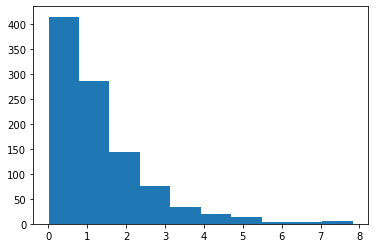

In [9]:
plt.hist(data);

2

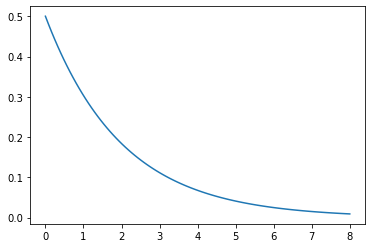

In [27]:
from scipy.stats import expon

tau = 2
#frozen = expon(scale=tau)
def expon_func(t, tau):
    return (1/tau)*np.exp(-t/tau)
limits = (0, 8)
x = np.linspace(*limits, 100)
#y = frozen.pdf(x)
y = expon_func(x, tau)
plt.plot(x, y);

In [29]:
from scipy.integrate import quad
#res = quad(frozen.pdf, 0, 1)[0]
res = quad(lambda x: expon_func(x, tau=tau), 0, 1)[0]

3

In [17]:
class Likelihood:
    def __init__(self, function, data):
        self.function = function 
        self.data = data

    def __call__(self, *params):
        return np.prod(self.function(self.data, *params))


class NLL(Likelihood):
    def __call__(self, *params):
        return -np.sum([np.log(self.function(self.data, *params))])

/var/folders/13/nbt0_qzj025_br3dxm0ph0sh0000gn/T/ipykernel_45611/1612609738.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return (1/tau)*np.exp(-t/tau)
/var/folders/13/nbt0_qzj025_br3dxm0ph0sh0000gn/T/ipykernel_45611/1612609738.py:6: RuntimeWarning: divide by zero encountered in true_divide
  return (1/tau)*np.exp(-t/tau)
/var/folders/13/nbt0_qzj025_br3dxm0ph0sh0000gn/T/ipykernel_45611/1612609738.py:6: RuntimeWarning: invalid value encountered in multiply
  return (1/tau)*np.exp(-t/tau)


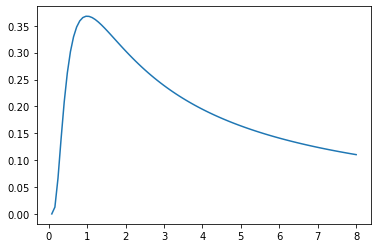

In [80]:
d1 = np.asarray([1])
#d1 = np.ones(100000)
lk = Likelihood(expon_func, d1)
#lk = Likelihood(expon.pdf, data)
pois = np.linspace(*limits, 100)
lk_values = [lk(poi) for poi in pois]
plt.plot(pois, lk_values);

In [73]:
one = expon_func(1, 2)
two = expon_func(0.5, 2)
three = expon_func(0.2, 2)
res = one*two*three
print(res)

0.05342686649359083


In [74]:
d_test = np.array([1, 0.5, 0.2])
lk_test = Likelihood(expon_func, d_test)
res_to_compare = lk_test(2)
print(res_to_compare)

0.05342686649359083


In [61]:
ff = expon_func(d_test, 2)

In [57]:
one, two, three

(0.3032653298563167, 0.38940039153570244, 0.45241870901797976)

In [58]:
one*two

0.11809163818525367

In [59]:
np.prod([one, two])

0.11809163818525367

In [64]:
np.prod(ff)

0.021721742931305642

In [66]:
ff[0]*ff[1]*ff[2]

0.021721742931305642

In [67]:
ff[0]

0.3032653298563167

In [68]:
one

0.3032653298563167

In [69]:
ff[1]

0.38940039153570244

In [70]:
two

0.38940039153570244

In [71]:
ff[2]

0.18393972058572117

In [72]:
three

0.45241870901797976